In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style(rc={'font.family': ['sans-serif'],'axis.labelsize': 20})
sns.set_context("notebook")

from scipy.fftpack import fft

# Example of zero-padding using Scipy

This post demonstrates a quick example of using the `Scipy` FFT routine and zero padding.

## Standard `scipy` example of an FFT

Adapeted from [the scipy docs](http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html), here is the standard example

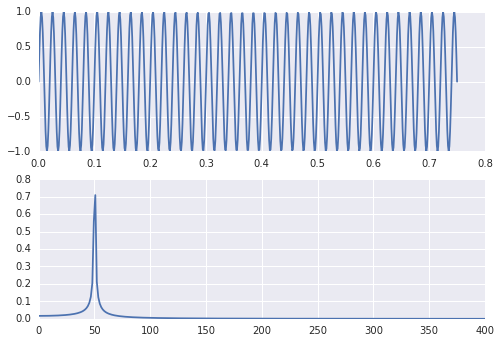

In [16]:
N = 600
T = 1.0 / 800.0
f = 50.0

x = np.linspace(0.0, N*T, N)
y = np.sin(f * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(x, y)
ax2.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
ax2.set_xlim(0, )
plt.show()

## Underresolved data

In this example, while the frequency is *obvious* in the time-domain, the limited number of data points means that the frequency-spectrum is underresolved: it's unclear exactly where the peak occurs.

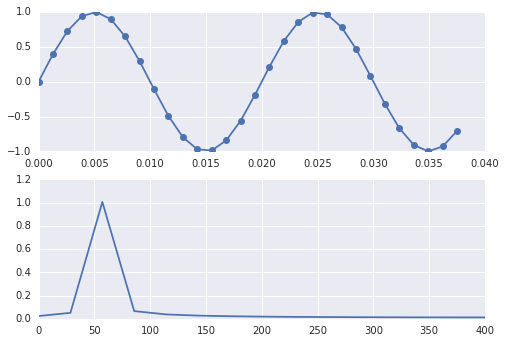

In [20]:
N = 30
T = 1.0 / 800.0
f = 50.0

x = np.linspace(0.0, N*T, N)
y = np.sin(f * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(x, y, '-o')
ax2.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
ax2.set_xlim(0, )
plt.show()

## Zero-padding

Often in nature, we are not given extra data in order to increase the resolution (recall that the frequency resolution in frequency is given by $\Delta f = 1/T$ where $T$ is the total observation span. To solve this, we can zero-pad the data set - literally just add zeros to the end.

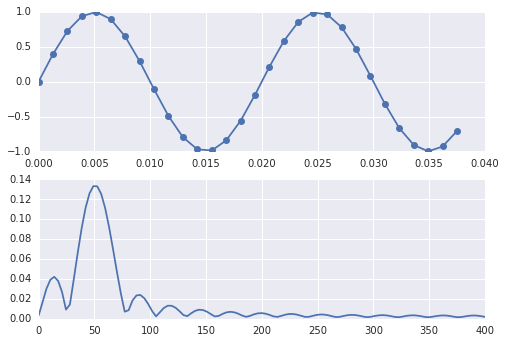

In [21]:
N = 30
T = 1.0 / 800.0
f = 50.0

x = np.linspace(0.0, N*T, N)
y = np.sin(f * 2.0*np.pi*x)

zeroN = 200
totalN = zeroN + N
zeropadded_y = np.zeros(zeroN + N)
zeropadded_y[:N] = y

yf = fft(zeropadded_y)
xf = np.linspace(0.0, 1.0/(2.0*T), totalN/2)

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(x, y, '-o')
ax2.plot(xf, 2.0/totalN * np.abs(yf[0:totalN/2]))
ax2.set_xlim(0, )
plt.show()

Note that, as discussed at length [in this article](http://www.ni.com/tutorial/4880/en/) this 'trick' does not buy spectral resolution. In essense the discrete time Fourier transform operates assuming that the data is an infinite sequence with zeros on either side of the waveform.